In [23]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.metrics import root_mean_squared_error, r2_score ,mean_absolute_percentage_error 

In [24]:
data = pd.read_csv('./data/winequality-red.csv', sep = ';') #aquí dejo el original de lectura de datos

data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
df = data.copy()

In [4]:
# sns.pairplot (df)

In [5]:
X = df.drop (columns ='quality')
y = df ['quality']

<Axes: ylabel='Frequency'>

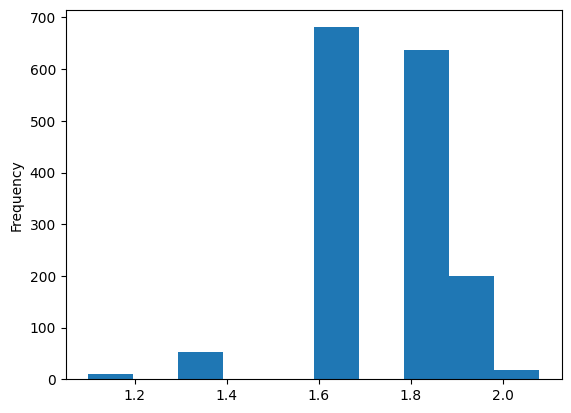

In [6]:
np.log(y).plot (kind='hist')

In [7]:
y.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


 primero hemos probado a predecir 'quality', que se trata de una variable discreta, con lo cual se trataría de un modelo de clasificación. 
 ________________________________________________________________________________________________________________________________

 Así pues, vamos a probar a predecir el 'alcohol', que es una variable numérica continua, con lo que será un modelo de regresión.

In [8]:
df = data.copy()

In [9]:
X = df.drop (columns ='alcohol')
y = df ['alcohol']

<Axes: ylabel='Frequency'>

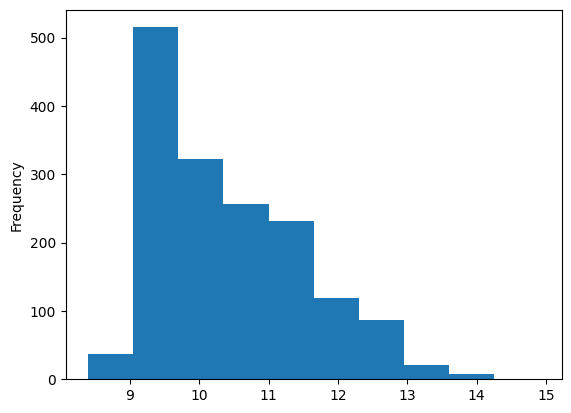

In [10]:
y.plot (kind='hist')

In [11]:
y.describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [12]:
np.log(y).mode()

0    2.251292
Name: alcohol, dtype: float64

In [13]:
np.log(y).describe()

count    1599.000000
mean        2.339021
std         0.098899
min         2.128232
25%         2.251292
50%         2.322388
75%         2.406945
max         2.701361
Name: alcohol, dtype: float64

<Axes: ylabel='Frequency'>

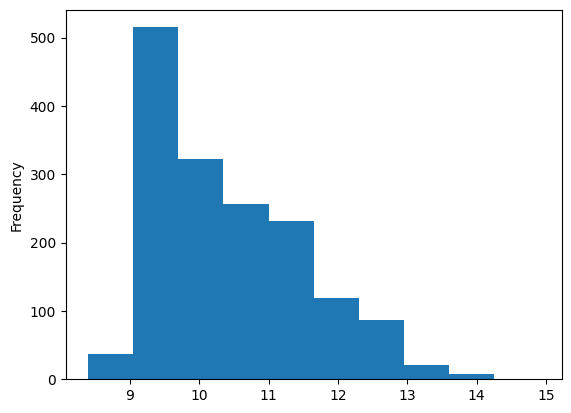

In [14]:
y.plot (kind='hist')

In [15]:
y = np.log(y)   # muy importante esta línea, pues aplicamos el logaritmo a la variable a predecir
# para hacer los test con esta nueva variable


In [16]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,5


<Axes: >

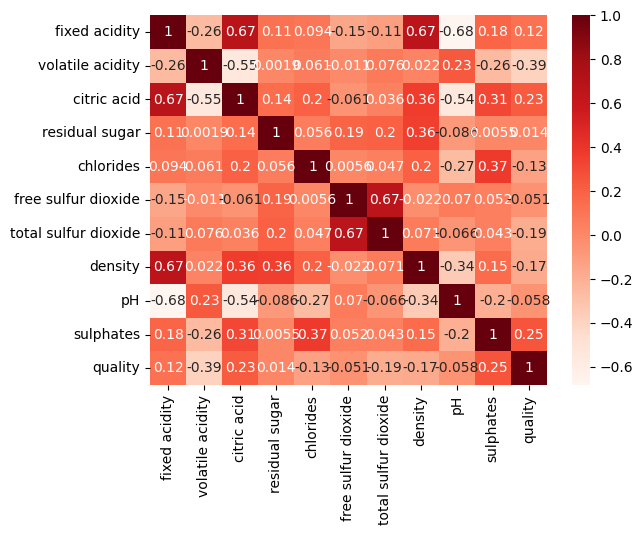

In [17]:
sns.heatmap(X.corr(), annot= True, cmap = 'Reds')

In [18]:
filt_corr = np.where(np.abs(X.corr())>0.5, X.corr(), 0)

#creamos un nuevo dataframe
f_corr_df = pd.DataFrame(filt_corr, index=X.corr().index, columns=X.corr().columns)

<Axes: >

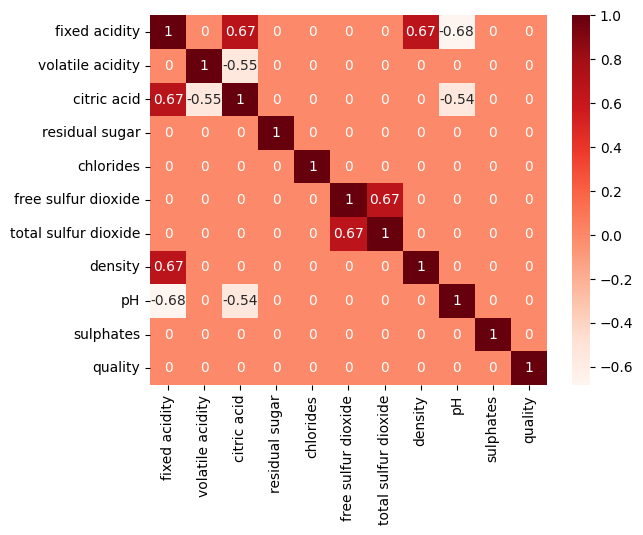

In [19]:
sns.heatmap(f_corr_df, annot= True, cmap = 'Reds')
# sns.heatmap(np.where(np.abs(X.corr())>0.5, X.corr(), 0), annot = True, cmap = 'Reds')

quiero hacer un modelo para ...

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=69)

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict (X_test)

print('RMSE:',root_mean_squared_error (y_test, y_pred))
print('R2:',r2_score(y_test, y_pred))
print('MAPE:',mean_absolute_percentage_error (y_test, y_pred))

RMSE: 0.05994792887068276
R2: 0.6414908626951068
MAPE: 0.020147996076300793


A ver si podemos entrenar mejor al modelo, cambiar variables, combinarlas, juntarlas, etc.. y/o probar modelos de 

lo primero, la distribución de la y estaba sesgada y ya mejora cuando le aplicamos el logaritmo, cosa que ya hicimos.